In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
# 데이터 가져오기
data = pd.read_csv('sent_score_new_en.csv')
data

,Unnamed: 0,Date,title,stock price fluctuations,sent_score
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0
...,...,...,...,...,...
360,360,20211227,"61 million won Bitcoin, 25 million won in the ...",1,1
361,361,20211228,"Ants sell Samsung Electronics 584 billion won,...",0,0
362,362,20211229,"""60% of serious accidents happen in the constr...",0,0
363,363,20211230,"Independent management of SK 'Intel NAND' ""We ...",0,0


In [3]:
data.set_index('Date', inplace = True)

## **AdaBoosting**

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
data.head()

,Unnamed: 0,title,stock price fluctuations,sent_score
Date,,,,
20210101,0,"[Book Village] Corporate personal ""Let's prepa...",1,1
20210102,1,"Suspension of Harimgak, a famous Chinese resta...",1,1
20210103,2,Only 9 out of 20 companies that have reduced g...,1,1
20210104,3,"Bernanke, ""The US economy recovers faster than...",1,1
20210105,4,"The government releases 180,000 tons of stockp...",0,0


In [6]:
# data.drop(['Unnamed: 0', 'title'], axis = 1, inplace = True)
data

,Unnamed: 0,title,stock price fluctuations,sent_score
Date,,,,
20210101,0,"[Book Village] Corporate personal ""Let's prepa...",1,1
20210102,1,"Suspension of Harimgak, a famous Chinese resta...",1,1
20210103,2,Only 9 out of 20 companies that have reduced g...,1,1
20210104,3,"Bernanke, ""The US economy recovers faster than...",1,1
20210105,4,"The government releases 180,000 tons of stockp...",0,0
...,...,...,...,...
20211227,360,"61 million won Bitcoin, 25 million won in the ...",1,1
20211228,361,"Ants sell Samsung Electronics 584 billion won,...",0,0
20211229,362,"""60% of serious accidents happen in the constr...",0,0


In [7]:
data1 = pd.read_csv('final_data_new.csv')
data1

,Date,compound,neg,neu,pos,Open,High,Low,Close,Volume
0,20210104,0.9999,0.043,0.807,0.149,819000.0,838000.0,804000.0,829000.0,182864
1,20210105,0.9999,0.044,0.796,0.160,825000.0,834000.0,818000.0,832000.0,119911
2,20210106,0.9998,0.054,0.807,0.140,828000.0,837000.0,816000.0,817000.0,145873
3,20210107,0.9998,0.044,0.793,0.163,824000.0,824000.0,816000.0,819000.0,116480
4,20210108,0.9995,0.065,0.793,0.142,821000.0,840000.0,815000.0,837000.0,263860
...,...,...,...,...,...,...,...,...,...,...
243,20211224,0.9993,0.033,0.814,0.153,896000.0,903000.0,885000.0,885000.0,49424
244,20211227,0.9997,0.053,0.794,0.153,885000.0,897000.0,885000.0,886000.0,57185
245,20211228,0.9994,0.051,0.818,0.132,891000.0,893000.0,883000.0,891000.0,90833
246,20211229,0.9996,0.055,0.805,0.139,899000.0,905000.0,884000.0,890000.0,71560


In [8]:
data1.drop(['compound', 'neg', 'neu', 'pos', 'Open', 'High', 'Low', 'Volume'], axis = 1, inplace = True)
data1

,Date,Close
0,20210104,829000.0
1,20210105,832000.0
2,20210106,817000.0
3,20210107,819000.0
4,20210108,837000.0
...,...,...
243,20211224,885000.0
244,20211227,886000.0
245,20211228,891000.0
246,20211229,890000.0


In [9]:
data1['Close'] = data1['Close']*800000
data1

,Date,Close
0,20210104,6.632000e+11
1,20210105,6.656000e+11
2,20210106,6.536000e+11
3,20210107,6.552000e+11
4,20210108,6.696000e+11
...,...,...
243,20211224,7.080000e+11
244,20211227,7.088000e+11
245,20211228,7.128000e+11
246,20211229,7.120000e+11


In [10]:
data.drop(['Unnamed: 0', 'title', 'stock price fluctuations'], axis=1, inplace=True)
data

,sent_score
Date,
20210101,1
20210102,1
20210103,1
20210104,1
20210105,0
...,...
20211227,1
20211228,0
20211229,0


In [11]:
data2 = data.merge(data1, on='Date', how='outer')

In [12]:
data2 = data2.dropna()

In [13]:
data2['Close'] = data2['Close']/800000
data2

,Date,sent_score,Close
3,20210104,1,829000.0
4,20210105,0,832000.0
5,20210106,1,817000.0
6,20210107,1,819000.0
7,20210108,0,837000.0
...,...,...,...
357,20211224,0,885000.0
360,20211227,1,886000.0
361,20211228,0,891000.0
362,20211229,0,890000.0


In [14]:
data2['sent_score'] = data2['sent_score']*800000
data2

,Date,sent_score,Close
3,20210104,800000,829000.0
4,20210105,0,832000.0
5,20210106,800000,817000.0
6,20210107,800000,819000.0
7,20210108,0,837000.0
...,...,...,...
357,20211224,0,885000.0
360,20211227,800000,886000.0
361,20211228,0,891000.0
362,20211229,0,890000.0


In [83]:
data2.set_index('Date', inplace=True)

In [84]:
feature_columns = list(data2.columns.difference(['Close']))
# feature_columns

X = data2[feature_columns]
y = data2['Close']


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198, 1) (50, 1) (198,) (50,)


### 학습

In [86]:
# 학습 데이터를 에이다부스트 모형에 적합 후 평가 데이터로 검증
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr1 = AdaBoostRegressor(n_estimators=300, random_state=42)
regr1.fit(X_train, y_train)
pred1 = regr1.predict(X_test)

regr2 = DecisionTreeRegressor(max_depth=4)
regr2.fit(X_train, y_train)
pred2 = regr2.predict(X_test)

print(mean_squared_error(y_test, pred1), mean_squared_error(y_test, pred2))
print('r2:', r2_score(y_test, pred1), r2_score(y_test, pred2))

4090343965.294946 3952213591.741303
r2: -0.08099415965901668 -0.04448913016763023


In [87]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

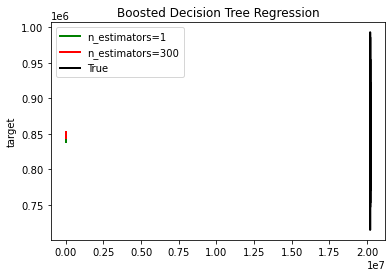

In [88]:
import matplotlib.pyplot as plt

plt.figure()
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(pred1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(pred2, c="r", label="n_estimators=300", linewidth=2)
plt.plot(y_test, c='k', label="True", linewidth=2)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

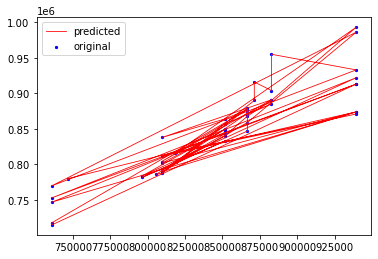

In [29]:
x_ax = range(len(y_test))
plt.scatter(pred1, y_test, s=5, color="blue", label="original")
plt.plot(pred1, y_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [32]:
# k-fold cross validataion 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, pred1, y_test, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

NameError: name 'ada_reg' is not defined

# CatBoostRegressor

In [20]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.24.0 in c:\users\ym\anaconda3\lib\site-packages (from catboost) (1.3.4)



In [21]:
from catboost import CatBoostRegressor
from catboost.utils import eval_metric

booster = CatBoostRegressor(iterations=100, verbose=10)

booster.fit(X_train, y_train, eval_set=(X_test, y_test))
booster.set_feature_names(feature_columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 : %.2f"%booster.score(X_test, y_test))
print("Train R2 : %.2f"%booster.score(X_train, y_train))

Learning rate set to 0.160869
0:	learn: 61052.0632428	test: 55444.2666488	best: 55444.2666488 (0)	total: 146ms	remaining: 14.4s
10:	learn: 33594.3555322	test: 30113.0844007	best: 30113.0844007 (10)	total: 149ms	remaining: 1.21s
20:	learn: 24819.3071196	test: 22785.5905553	best: 22785.5905553 (20)	total: 153ms	remaining: 575ms
30:	learn: 22083.3719155	test: 19063.5327972	best: 19063.5327972 (30)	total: 156ms	remaining: 347ms
40:	learn: 19231.6174714	test: 17673.5414394	best: 17673.5414394 (40)	total: 159ms	remaining: 229ms
50:	learn: 16518.6460297	test: 17229.0546160	best: 17229.0546160 (50)	total: 163ms	remaining: 156ms
60:	learn: 15448.1233358	test: 17074.7227646	best: 17074.7227646 (60)	total: 166ms	remaining: 106ms
70:	learn: 14549.9069301	test: 16968.2067200	best: 16962.0185799 (64)	total: 170ms	remaining: 69.4ms
80:	learn: 13504.6621569	test: 16830.4440077	best: 16779.2448292 (79)	total: 173ms	remaining: 40.7ms
90:	learn: 12950.8928059	test: 16967.4954978	best: 16779.2448292 (79)	

In [22]:
booster = CatBoostRegressor()

params = {
            'iterations':[100,500],
            'learning_rate':[0.01, 0.1],
            'verbose':[0.1,10],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = booster.grid_search(params, X_train, y_train, cv=5, )

print("\nBest Params : ", search_results['params'])

0:	learn: 841412.7198546	test: 852882.2360891	best: 852882.2360891 (0)	total: 300us	remaining: 29.7ms
10:	learn: 767911.5815611	test: 778715.8779689	best: 778715.8779689 (10)	total: 2.98ms	remaining: 24.1ms
20:	learn: 701847.7074311	test: 712288.8487118	best: 712288.8487118 (20)	total: 6.18ms	remaining: 23.2ms
30:	learn: 640923.1636480	test: 651742.4308030	best: 651742.4308030 (30)	total: 8.64ms	remaining: 19.2ms
40:	learn: 585193.3974869	test: 595898.8615559	best: 595898.8615559 (40)	total: 11.1ms	remaining: 16ms
50:	learn: 534752.7614117	test: 544951.8260403	best: 544951.8260403 (50)	total: 13.9ms	remaining: 13.3ms
60:	learn: 489259.9191486	test: 498765.7575653	best: 498765.7575653 (60)	total: 16.4ms	remaining: 10.5ms
70:	learn: 445846.6798204	test: 455103.3380999	best: 455103.3380999 (70)	total: 18ms	remaining: 7.35ms
80:	learn: 407223.5222720	test: 416246.2392652	best: 416246.2392652 (80)	total: 20.2ms	remaining: 4.73ms
90:	learn: 372187.3635720	test: 380710.3547057	best: 380710.35


bestTest = 36982.75031
bestIteration = 499

4:	loss: 36982.7503065	best: 19950.5458614 (2)	total: 298ms	remaining: 656ms
0:	learn: 840943.0507189	test: 852608.7407469	best: 852608.7407469 (0)	total: 175us	remaining: 87.6ms
10:	learn: 767773.4613562	test: 778618.5391748	best: 778618.5391748 (10)	total: 2.9ms	remaining: 129ms
20:	learn: 700297.5444621	test: 710772.1699520	best: 710772.1699520 (20)	total: 6.59ms	remaining: 150ms
30:	learn: 638734.3194704	test: 649128.0676409	best: 649128.0676409 (30)	total: 8.86ms	remaining: 134ms
40:	learn: 582253.1230355	test: 592401.3249169	best: 592401.3249169 (40)	total: 10.9ms	remaining: 122ms
50:	learn: 532034.1654089	test: 542064.2054397	best: 542064.2054397 (50)	total: 13.4ms	remaining: 118ms
60:	learn: 485772.2770659	test: 495472.5925564	best: 495472.5925564 (60)	total: 15.7ms	remaining: 113ms
70:	learn: 443261.0411443	test: 452637.9267151	best: 452637.9267151 (70)	total: 18ms	remaining: 108ms
80:	learn: 404947.0193556	test: 413979.7765900	best

270:	learn: 10083.9996374	test: 16721.7414726	best: 16638.7415698 (232)	total: 107ms	remaining: 90.4ms
280:	learn: 9944.4167270	test: 16710.7835882	best: 16638.7415698 (232)	total: 114ms	remaining: 89ms
290:	learn: 9788.8014920	test: 16749.8045940	best: 16638.7415698 (232)	total: 118ms	remaining: 84.9ms
300:	learn: 9661.8070283	test: 16749.5946631	best: 16638.7415698 (232)	total: 122ms	remaining: 80.8ms
310:	learn: 9541.6666544	test: 16678.4003948	best: 16638.7415698 (232)	total: 126ms	remaining: 76.6ms
320:	learn: 9442.7042850	test: 16744.3795228	best: 16638.7415698 (232)	total: 130ms	remaining: 72.6ms
330:	learn: 9347.5676437	test: 16789.9098653	best: 16638.7415698 (232)	total: 134ms	remaining: 68.5ms
340:	learn: 9279.2046195	test: 16798.8202887	best: 16638.7415698 (232)	total: 138ms	remaining: 64.5ms
350:	learn: 9191.9630965	test: 16812.0586481	best: 16638.7415698 (232)	total: 142ms	remaining: 60.5ms
360:	learn: 9117.1123697	test: 16780.8622273	best: 16638.7415698 (232)	total: 147ms

270:	learn: 9589.0332328	test: 21521.3647013	best: 21474.4667488 (263)	total: 109ms	remaining: 91.9ms
280:	learn: 9451.5226301	test: 21505.4163789	best: 21474.4667488 (263)	total: 113ms	remaining: 88ms
290:	learn: 9303.6059948	test: 21408.8693035	best: 21408.8693035 (290)	total: 117ms	remaining: 84.1ms
300:	learn: 9192.0201245	test: 21344.1833331	best: 21343.4114906 (297)	total: 121ms	remaining: 80ms
310:	learn: 9090.4098533	test: 21320.6360432	best: 21311.0764503 (309)	total: 125ms	remaining: 76.1ms
320:	learn: 8966.8690042	test: 21292.0311420	best: 21284.2100198 (319)	total: 129ms	remaining: 72ms
330:	learn: 8891.6949099	test: 21284.5527155	best: 21282.1648050 (329)	total: 133ms	remaining: 68ms
340:	learn: 8802.3148247	test: 21203.2654718	best: 21203.2654718 (340)	total: 138ms	remaining: 64.5ms
350:	learn: 8715.1600981	test: 21150.1947941	best: 21150.1947941 (350)	total: 142ms	remaining: 60.5ms
360:	learn: 8637.3257850	test: 21142.8537340	best: 21128.7868459 (354)	total: 146ms	remain

120:	learn: 13743.1562388	test: 42913.6697446	best: 42913.6697446 (120)	total: 43.4ms	remaining: 136ms
130:	learn: 13186.3243935	test: 42732.3658558	best: 42618.6926756 (126)	total: 47.8ms	remaining: 135ms
140:	learn: 12616.7288375	test: 42234.4991371	best: 42234.4991371 (140)	total: 52ms	remaining: 133ms
150:	learn: 12103.6869200	test: 41983.5616916	best: 41983.5616916 (150)	total: 56.8ms	remaining: 131ms
160:	learn: 11719.5170514	test: 41935.8989773	best: 41768.0188020 (157)	total: 60.8ms	remaining: 128ms
170:	learn: 11434.4684413	test: 42002.3370869	best: 41768.0188020 (157)	total: 65.3ms	remaining: 126ms
180:	learn: 11134.6173623	test: 41934.4296174	best: 41768.0188020 (157)	total: 69.1ms	remaining: 122ms
190:	learn: 10801.0302922	test: 41834.5362152	best: 41768.0188020 (157)	total: 73.2ms	remaining: 118ms
200:	learn: 10597.0388101	test: 41672.6464895	best: 41672.6464895 (200)	total: 77.1ms	remaining: 115ms
210:	learn: 10356.6927728	test: 41668.5211744	best: 41621.0546966 (208)	tot

130:	learn: 14992.7748967	test: 18506.6734232	best: 18506.6734232 (130)	total: 44.3ms	remaining: 125ms
140:	learn: 14283.9349491	test: 17917.6606028	best: 17917.6606028 (140)	total: 48.2ms	remaining: 123ms
150:	learn: 13718.5476780	test: 17731.8870217	best: 17717.6973200 (148)	total: 52.1ms	remaining: 120ms
160:	learn: 13166.9739037	test: 17708.9840525	best: 17653.7057426 (157)	total: 56.1ms	remaining: 118ms
170:	learn: 12709.5960346	test: 17590.5191811	best: 17566.2246998 (164)	total: 59.9ms	remaining: 115ms
180:	learn: 12251.7077057	test: 17400.1067428	best: 17400.1067428 (180)	total: 63.9ms	remaining: 113ms
190:	learn: 11863.9257494	test: 17298.3978702	best: 17287.2660057 (188)	total: 67.8ms	remaining: 110ms
200:	learn: 11599.7976789	test: 17216.6853758	best: 17216.6853758 (200)	total: 71.8ms	remaining: 107ms
210:	learn: 11338.4732729	test: 17029.2852451	best: 17024.3339506 (209)	total: 75.9ms	remaining: 104ms
220:	learn: 11078.5785674	test: 17120.2942183	best: 17024.3339506 (209)	t

In [23]:
booster = CatBoostRegressor(iterations=500, verbose=10, learning_rate= 0.1, bootstrap_type= 'No')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))
booster.set_feature_names(feature_columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 : %.2f"%booster.score(X_test, y_test))
print("Train R2 : %.2f"%booster.score(X_train, y_train))

0:	learn: 63537.7432107	test: 57824.3479054	best: 57824.3479054 (0)	total: 350us	remaining: 175ms
10:	learn: 38811.4097632	test: 34227.3692843	best: 34227.3692843 (10)	total: 3.57ms	remaining: 159ms
20:	learn: 28921.6446870	test: 25708.6948397	best: 25708.6948397 (20)	total: 6.84ms	remaining: 156ms
30:	learn: 24455.1865957	test: 21218.5976126	best: 21218.5976126 (30)	total: 10.5ms	remaining: 159ms
40:	learn: 22123.2708016	test: 19293.7734069	best: 19293.7734069 (40)	total: 13.8ms	remaining: 154ms
50:	learn: 20476.3855099	test: 18500.4636203	best: 18500.4636203 (50)	total: 17.3ms	remaining: 153ms
60:	learn: 18838.3725459	test: 17741.7278208	best: 17741.7278208 (60)	total: 21.4ms	remaining: 154ms
70:	learn: 17729.7888985	test: 17495.4179004	best: 17479.1398783 (69)	total: 25.1ms	remaining: 152ms
80:	learn: 16446.5282799	test: 17280.5697364	best: 17280.5697364 (80)	total: 29.2ms	remaining: 151ms
90:	learn: 15869.3044394	test: 17063.5570686	best: 17058.3419489 (89)	total: 33.2ms	remaining:

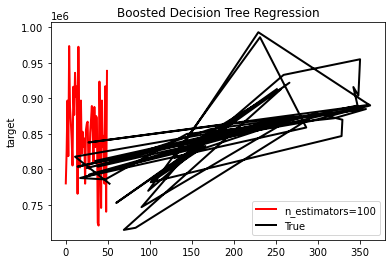

In [24]:
import matplotlib.pyplot as plt

plt.figure()
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(test_preds, c="r", label="n_estimators=100", linewidth=2)
plt.plot(y_test, c='k', label="True", linewidth=2)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()